In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
!pip install -q pyyaml h5py

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [7]:
frames= [data,test]

In [8]:
result = pd.concat(frames)

In [ ]:
result

,Artist,Song,Genre,Language,Lyrics,Song year,Track_id
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ...",NaN,NaN
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...,NaN,NaN
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v...",NaN,NaN
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...,NaN,NaN
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...,NaN,NaN
...,...,...,...,...,...,...,...
7930,amanda-marshall,too-little-too-late,Rock,NaN,Tuesday night - 7:30\nI hear a voice on the te...,2006.0,23453.0
7931,aurora-borealis,berserker,Metal,NaN,Elite forces cloaked in fur un sensitive to pa...,2007.0,2724.0
7932,dr-dre,natural-born-killaz,Hip-Hop,NaN,[Dr. Dre]\nJourney with me\nInto the mind of a...,2010.0,24147.0
7933,chris-cornell,wide-awake,Rock,NaN,You can a look a hurricane right in the eye.\n...,2011.0,4150.0


In [9]:
count = result['Artist'].value_counts()
print(count.head(10))


elvis presley         1611
chris brown           1239
elvis costello         923
ella fitzgerald        874
the rolling stones     820
bee gees               811
glee                   765
bad religion           752
beyonce                752
elton john             728
Name: Artist, dtype: int64


In [10]:
options = ['elvis presley','chris brown','elvis costello','ella fitzgerald','the rolling stones','bee gees','glee','bad religion','beyonce', 'elton john' ]

In [11]:
rslt_df = result[result['Artist'].isin(options)]

In [ ]:
rslt_df

,Artist,Song,Genre,Language,Lyrics,Song year,Track_id
3791,bad religion,american jesus,Pop,en,"I don't need to be a global citizen,\n'Cuz I'm...",NaN,NaN
3792,bad religion,infected,Pop,en,"Infected\nNow here I go,\nHope I don't break d...",NaN,NaN
3793,bad religion,a walk,Pop,en,I'm going for a walk\nnot the after dinner kin...,NaN,NaN
3794,bad religion,sorrow,Pop,en,Father can you hear me?\nHow have I let you do...,NaN,NaN
3795,bad religion,you,Pop,en,There's a place where everyone can be happy\nI...,NaN,NaN
...,...,...,...,...,...,...,...
289878,ella fitzgerald,too marvelous for words,Jazz,en,You're just too marvelous Too marvelous for wo...,NaN,NaN
289948,chris brown,i get around,Hip-Hop,en,"Up, high, down, low I be anywhere you want Not...",NaN,NaN
290027,ella fitzgerald,ev rything i ve got,Jazz,en,"Don't stamp your foot at me, It's impolite To ...",NaN,NaN
1574,beyonce,6-inch,Pop,NaN,"Six inch heels, she walked in the club like no...",2016.0,5220.0


In [12]:
df = pd.DataFrame(rslt_df, columns = ['Artist', 'Lyrics'])
df['Lyrics'] = df['Lyrics'].astype(str)
df.Artist = df.Artist.str.replace(' ','_')

In [ ]:
df.head(10)

,Artist,Lyrics
3791,bad_religion,"I don't need to be a global citizen,\n'Cuz I'm..."
3792,bad_religion,"Infected\nNow here I go,\nHope I don't break d..."
3793,bad_religion,I'm going for a walk\nnot the after dinner kin...
3794,bad_religion,Father can you hear me?\nHow have I let you do...
3795,bad_religion,There's a place where everyone can be happy\nI...
3796,bad_religion,"Like a rock, like a planet\nLike a fucking ato..."
3797,bad_religion,"I can't believe it,\nThe way you look sometime..."
3798,bad_religion,culture was the seed of proliferation\nbut it ...
3799,bad_religion,"see my body, it's nothing to get hung about.\n..."
3800,bad_religion,Have you been to the desert?\nHave you walked ...


In [13]:
lyrics = df['Lyrics'].values
artist = df['Artist'].values


In [14]:
from sklearn.model_selection import train_test_split

lyrics_train, lyrics_val, artist_train, artist_val = train_test_split(lyrics, artist, test_size=0.1, random_state=100)

lyrics_train.shape, lyrics_val.shape, artist_train.shape, artist_val.shape

((8347,), (928,), (8347,), (928,))

In [ ]:
lyrics_train.dtype, artist_train.dtype

(dtype('O'), dtype('O'))

In [15]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
vectorizer = TextVectorization(max_tokens=5000, output_sequence_length=400)
text_ds = tf.data.Dataset.from_tensor_slices(lyrics_train).batch(128)
vectorizer.adapt(text_ds)

In [ ]:
vectorizer.get_vocabulary()[:5]

['', '[UNK]', 'you', 'i', 'the']

In [21]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(artist_train)
y_train = encoder.transform(artist_train)
y_val = encoder.transform(artist_val)

In [ ]:
y_train.shape, y_train

((8347,), array([3, 0, 6, ..., 6, 7, 8]))

In [ ]:
y_val.shape, y_val

((928,),
 array([3, 8, 6, 5, 3, 4, 4, 5, 4, 1, 7, 9, 3, 4, 9, 3, 4, 5, 8, 7, 0, 8,
        8, 4, 9, 6, 7, 0, 3, 8, 1, 6, 8, 3, 7, 1, 0, 7, 6, 1, 7, 4, 8, 7,
        5, 1, 4, 7, 8, 1, 6, 6, 4, 9, 7, 7, 6, 4, 9, 4, 2, 0, 9, 4, 4, 6,
        0, 1, 1, 7, 4, 7, 5, 3, 3, 2, 4, 3, 0, 7, 8, 6, 4, 4, 9, 4, 7, 5,
        7, 2, 4, 3, 6, 3, 7, 1, 6, 5, 6, 5, 9, 9, 4, 6, 1, 4, 7, 4, 0, 9,
        9, 1, 6, 7, 6, 4, 6, 6, 6, 7, 1, 1, 0, 7, 0, 9, 1, 7, 9, 2, 7, 5,
        9, 7, 3, 7, 4, 1, 9, 6, 7, 1, 7, 1, 6, 7, 3, 6, 7, 3, 4, 7, 1, 5,
        7, 7, 7, 8, 3, 9, 9, 2, 7, 9, 7, 1, 5, 7, 6, 9, 3, 6, 8, 2, 3, 4,
        1, 7, 3, 1, 1, 9, 5, 8, 3, 6, 3, 9, 5, 6, 5, 5, 4, 1, 7, 3, 0, 8,
        2, 3, 1, 0, 7, 6, 5, 7, 4, 0, 2, 1, 0, 1, 7, 2, 2, 4, 2, 2, 4, 3,
        1, 1, 3, 6, 7, 7, 7, 4, 9, 1, 7, 1, 8, 9, 8, 9, 4, 8, 7, 5, 4, 8,
        8, 8, 0, 3, 5, 1, 6, 8, 4, 3, 8, 7, 1, 1, 2, 7, 3, 7, 6, 8, 4, 3,
        2, 7, 7, 7, 5, 5, 2, 0, 2, 8, 8, 4, 0, 7, 4, 6, 9, 3, 9, 9, 3, 3,
        5, 7, 5, 9, 6, 5, 6, 

In [ ]:
(unique, counts) = np.unique(y_val, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[  0  64]
 [  1  88]
 [  2  73]
 [  3 106]
 [  4  90]
 [  5  83]
 [  6 105]
 [  7 152]
 [  8  88]
 [  9  79]]


In [17]:
X_train = vectorizer(lyrics_train)  # Transforms each text in texts to a sequence of integers with its corresponding integer value from the word_index dictionary
X_val = vectorizer(lyrics_val)


In [ ]:
print(X_train[0])

tf.Tensor(
[3504  583   75  671  583    1 4498 1517 1146  583  208   25   39   71
   91   84   64   24  295  686    6 1182   10   50    3   17    2   26
  102   51   74    6  181    2   51   74    6  181    2    3   35 3565
    4  815 2340   10   50  443    9  177  147  214   26   36    3   63
   77   49   40  175   13 1017   19   13   40  175   10 1017    3  135
  605   59    9  108    6  108 4002  674 1571  161   40    3   61   26
   41    3  121    6  752    4 2392   80    4    1    3  135   61   10
   39   74    7  300   28   35  888  183    2   35 1100    1    3   23
    2   58    7 1825  114   35   73    2 2925  825  161    7 2148   40
   16  380   61   22   17   22   81 1063   81 4498   19    2  122   38
   22  268   31    8  411    3  200   10  716    2  402    3   75   18
   31    2   19    3   75   23   22   41   33  567   42   10  135  387
    8   24   41    2  119    3   23   62    3   18   14    9    1    5
    1    5   98    1   19    4  688   39 1365  102   37  137   20 

In [ ]:
def FindMaxLength(lst):
    
    maxLength = max(len(x) for x in lst )
  
    return maxLength

print(FindMaxLength(X_train))

400


In [18]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-05-07 01:19:35--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-05-07 01:19:35--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-05-07 01:19:35--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [19]:
import os
import pathlib

embeddings_index = {}
f = open('glove.6B.200d.txt', encoding='utf-8')
for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [22]:
num_tokens = len(voc) + 1
embedding_dim = 200
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 4823 words (177 misses)


In [23]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=True,
)

In [24]:
from keras.callbacks import EarlyStopping


model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_SingleL.h5')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mod_test =model.fit(X_train,y_train, batch_size=64, epochs=10, validation_data=(X_val,y_val),callbacks=[es])

Epoch 1/10
131/131 [==============================] - 38s 50ms/step - loss: 2.0784 - acc: 0.2656 - val_loss: 1.9078 - val_acc: 0.2974
Epoch 2/10
131/131 [==============================] - 6s 45ms/step - loss: 1.7711 - acc: 0.3521 - val_loss: 1.7310 - val_acc: 0.3373
Epoch 3/10
131/131 [==============================] - 6s 46ms/step - loss: 1.5277 - acc: 0.4599 - val_loss: 1.6731 - val_acc: 0.4321
Epoch 4/10
131/131 [==============================] - 6s 46ms/step - loss: 1.2769 - acc: 0.5603 - val_loss: 1.5401 - val_acc: 0.4828
Epoch 5/10
131/131 [==============================] - 6s 47ms/step - loss: 1.0636 - acc: 0.6396 - val_loss: 1.5133 - val_acc: 0.5226
Epoch 6/10
131/131 [==============================] - 6s 46ms/step - loss: 0.8947 - acc: 0.6953 - val_loss: 1.3595 - val_acc: 0.5603
Epoch 7/10
131/131 [==============================] - 6s 46ms/step - loss: 0.7266 - acc: 0.7560 - val_loss: 1.2386 - val_acc: 0.6250
Epoch 8/10
131/131 [==============================] - 6s 46ms/step -

In [25]:
model.save('lstmtfl.h5')

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, y_val, verbose=False)
print("validation Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.7968
validation Accuracy:  0.5991


In [ ]:
prediction = model.predict(X_train)

labels = ['bad religion', 'bee gees', 'beyonce', 'chris brown', 'ella fitzgerald', 'elton john', 'elvis costello', 'elvis presley', 'glee', 'the rolling stones']
print(prediction)
pred_str = []
for i in range(8347):
  pred_str.append(labels[np.argmax(prediction[i])])


(unique, counts) = np.unique(pred_str, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[1.2199609e-08 1.4094957e-03 1.1857445e-03 ... 1.4755252e-03
  1.1122129e-03 8.8469608e-04]
 [9.7155082e-01 6.9270953e-07 7.8308638e-03 ... 9.9372948e-05
  8.9866859e-05 4.3132538e-03]
 [9.4115734e-03 1.9849463e-01 6.2013965e-02 ... 5.2551989e-02
  3.0951244e-01 9.9035040e-02]
 ...
 [2.5030726e-05 9.3926296e-02 6.3269455e-03 ... 3.8149808e-02
  1.3873946e-02 5.3044189e-02]
 [4.0823483e-10 1.3095730e-04 3.4517459e-08 ... 9.9801469e-01
  5.5161794e-04 2.2798097e-04]
 [4.8080565e-05 3.6401615e-01 1.4242223e-03 ... 2.7544230e-01
  1.3833526e-01 1.8551730e-02]]
[['bad religion' '709']
 ['bee gees' '909']
 ['beyonce' '664']
 ['chris brown' '1178']
 ['ella fitzgerald' '824']
 ['elton john' '572']
 ['elvis costello' '747']
 ['elvis presley' '1435']
 ['glee' '839']
 ['the rolling stones' '470']]


In [ ]:
modelnew = tf.keras.models.load_model('lstmtfl.h5')
prediction = modelnew.predict(X_val)

labels = ['bad_religion', 'bee_gees', 'beyonce', 'chris_brown', 'ella_fitzgerald', 'elton_john', 'elvis_costello', 'elvis_presley', 'glee', 'the_rolling_stones']
print(prediction)
pred_str = []
for i in range(700):
  pred_str.append(labels[np.argmax(prediction[i])])
(unique, counts) = np.unique(pred_str, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[1.20740323e-19 5.16710156e-12 1.03835891e-10 ... 5.98329570e-05
  1.43649270e-08 2.17969571e-08]
 [1.09899374e-04 3.66530657e-01 2.34725308e-02 ... 5.67903146e-02
  1.18681237e-01 3.22115310e-02]
 [1.59461226e-04 5.11186540e-01 4.82579134e-03 ... 5.74337281e-02
  1.24350727e-01 3.61848772e-02]
 ...
 [4.73456166e-04 2.01499149e-01 2.03059092e-02 ... 3.84292863e-02
  6.05450869e-01 4.98366654e-02]
 [9.19759199e-02 9.77465734e-02 1.22665249e-01 ... 6.51062727e-02
  1.15334108e-01 1.30282968e-01]
 [7.99741685e-01 1.35854702e-04 6.09875135e-02 ... 2.43738946e-03
  2.29082280e-03 3.06914914e-02]]
[['bad_religion' '56']
 ['bee_gees' '84']
 ['beyonce' '57']
 ['chris_brown' '85']
 ['ella_fitzgerald' '79']
 ['elton_john' '51']
 ['elvis_costello' '74']
 ['elvis_presley' '113']
 ['glee' '70']
 ['the_rolling_stones' '31']]


  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.29-cp37-none-any.whl size=8614 sha256=88ce1ad6dacff4fc466782dba799df7f94ad85482fd237f5d46e08564b99e1b3
  Stored in directory: /root/.cache/pip/wheels/8b/cb/fb/cbeba24d72e736b8987b7d0dc37afc0e76f3c16e544ceff727
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.26-cp37-none-any.whl size=7610 sha256=96869d3e17ec6a2d805891d4551c09acb143318ea45dd24d612d8dab59c08edc
  Stored in directory: /root/.cache/pip/wheels/2a/62/31/d348320becc60729f508a2c5aad445b94d7543c5cb577cfb9d
  Created wheel for compress-json: filename=compress_json-1.0.4-cp37-none-any.whl size=4586 sha256=510544c61d6700633e47cd2367017328ec7e011c63e7227baee6b32e9dfce5e6
  Stored in directory: /root/.cache/pip/wheels/83/ec/21/51460dd508e4a152c0643946c21fae84eb3391171164d35745
Successfully built plot-keras-history sanitize-ml-labels compress-json


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6cb51bcd0>,
       dtype=object))

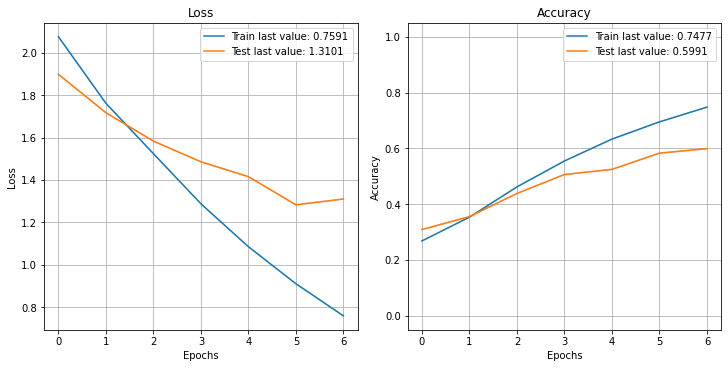

In [ ]:
import matplotlib.pyplot as plt
from plotly.offline import iplot
!pip install plot_keras_history
from plot_keras_history import plot_history
plot_history(mod_test)

In [ ]:
from keras.callbacks import EarlyStopping
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1kUigTOFrNfxGPzQoLsuhN4dXEJa1w5Al', dest_path='./model/modeltl.h5')
model = tf.keras.models.load_model('./model/modeltl.h5')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mod_test =model.fit(X_train,y_train, batch_size=64, epochs=10, validation_data=(X_val,y_val),callbacks=[es])

Epoch 1/10
131/131 [==============================] - 45s 92ms/step - loss: 2.1220 - acc: 0.2340 - val_loss: 1.9663 - val_acc: 0.2672
Epoch 2/10
131/131 [==============================] - 11s 84ms/step - loss: 1.8538 - acc: 0.3199 - val_loss: 1.7835 - val_acc: 0.3287
Epoch 3/10
131/131 [==============================] - 11s 85ms/step - loss: 1.6881 - acc: 0.3860 - val_loss: 1.7293 - val_acc: 0.3966
Epoch 4/10
131/131 [==============================] - 11s 85ms/step - loss: 1.5285 - acc: 0.4748 - val_loss: 1.6060 - val_acc: 0.4472
Epoch 5/10
131/131 [==============================] - 11s 85ms/step - loss: 1.3761 - acc: 0.5261 - val_loss: 1.5068 - val_acc: 0.4925
Epoch 6/10
131/131 [==============================] - 11s 85ms/step - loss: 1.2555 - acc: 0.5692 - val_loss: 1.4776 - val_acc: 0.4806
Epoch 7/10
131/131 [==============================] - 11s 85ms/step - loss: 1.1367 - acc: 0.6151 - val_loss: 1.5078 - val_acc: 0.4957
Epoch 00007: early stopping


In [ ]:

from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1kUigTOFrNfxGPzQoLsuhN4dXEJa1w5Al', dest_path='./model/modelrnnTF.h5')
model = tf.keras.models.load_model('./model/modelrnnTF.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 400, 200)          1000000   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 200)               80200     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,101,310
Trainable params: 1,101,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import load_model
from keras.callbacks import EarlyStopping
model1=keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_MultiL.h5')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mod_test =model1.fit(X_train,y_train, batch_size=64, epochs=10, validation_data=(X_val,y_val),callbacks=[es])

Epoch 1/10
131/131 [==============================] - 14s 93ms/step - loss: 2.1335 - acc: 0.2377 - val_loss: 1.9366 - val_acc: 0.2705
Epoch 2/10
131/131 [==============================] - 11s 85ms/step - loss: 1.8446 - acc: 0.3243 - val_loss: 1.8791 - val_acc: 0.3222
Epoch 3/10
131/131 [==============================] - 11s 86ms/step - loss: 1.7462 - acc: 0.3844 - val_loss: 1.9183 - val_acc: 0.2963
Epoch 00003: early stopping


In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, y_val, verbose=False)
print("validation Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.2524
validation Accuracy:  0.2274


In [ ]:
model.save('modeltl.h5')

In [ ]:
prediction = model.predict(X_train)

labels = ['bad religion', 'bee gees', 'beyonce', 'chris brown', 'ella fitzgerald', 'elton john', 'elvis costello', 'elvis presley', 'glee', 'the rolling stones']
print(prediction)
pred_str = []
for i in range(8347):
  pred_str.append(labels[np.argmax(prediction[i])])


(unique, counts) = np.unique(pred_str, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[0.00042005 0.00046018 0.10511097 ... 0.00229061 0.01853838 0.00232747]
 [0.09851405 0.12625805 0.04641497 ... 0.20145546 0.06334718 0.09822866]
 [0.09851405 0.12625805 0.04641497 ... 0.20145546 0.06334718 0.09822866]
 ...
 [0.06922794 0.11141008 0.08968391 ... 0.18996823 0.08617269 0.10948461]
 [0.09851406 0.12625805 0.04641497 ... 0.20145546 0.06334719 0.09822867]
 [0.09851406 0.12625805 0.04641497 ... 0.20145546 0.06334719 0.09822867]]
['ella_fitzgerald', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'ella_fitzgerald', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'bad_religion', 'ella_fitzgerald', 'ella_fitzgerald',

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f31692a3710>,
       dtype=object))

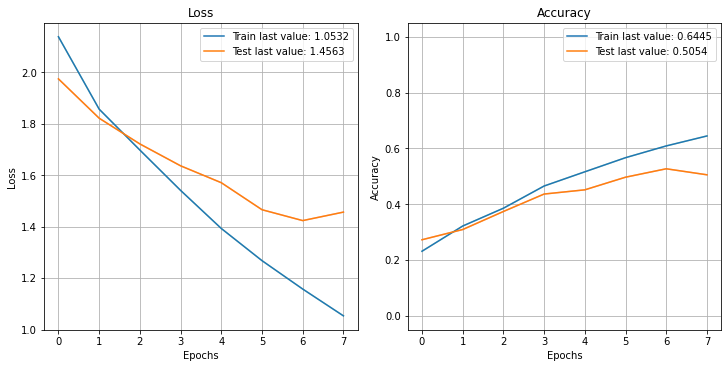

In [ ]:
import matplotlib.pyplot as plt
from plotly.offline import iplot
!pip install plot_keras_history
from plot_keras_history import plot_history
plot_history(mod_test)

RNN from scratch

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, SimpleRNN

## create model

vocab_size=5000


          # input_length is the length of the sequence
modelRNN = Sequential()

modelRNN.add(Embedding(input_dim=vocab_size,          # input_dim is the size of the vocabulary
                           output_dim=embedding_dim,      # output_dim is the size of the dense vector
                           input_length=400))
modelRNN.add(SimpleRNN(embedding_dim))
modelRNN.add(Dense(200, activation='relu'))
modelRNN.add(Dropout(0.2))
modelRNN.add(Dense(10, activation='softmax'))

modelRNN.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 400, 200)          1000000   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 200)               80200     
_________________________________________________________________
dense (Dense)                (None, 200)               40200     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 1,122,410
Trainable params: 1,122,410
Non-trainable params: 0
_________________________________________________________________


[[0.00243493 0.00232321 0.44465724 ... 0.00307112 0.04687304 0.00241296]
 [0.01705794 0.03410567 0.01084255 ... 0.51283646 0.03533327 0.05858924]
 [0.01705795 0.03410568 0.01084255 ... 0.51283634 0.03533327 0.05858924]
 ...
 [0.07499576 0.0910959  0.05163916 ... 0.27884927 0.07180508 0.11679089]
 [0.01705795 0.03410568 0.01084255 ... 0.51283634 0.03533328 0.05858924]
 [0.01705795 0.03410568 0.01084255 ... 0.51283634 0.03533329 0.05858924]]
[['beyonce' '31']
 ['chris_brown' '27']
 ['elvis_presley' '442']]


In [ ]:
prediction = modelRNN.predict(X_val)

labels = ['bad_religion', 'bee_gees', 'beyonce', 'chris_brown', 'ella_fitzgerald', 'elton_john', 'elvis_costello', 'elvis_presley', 'glee', 'the_rolling_stones']
print(prediction)
pred_str = []
for i in range(500):
  pred_str.append(labels[np.argmax(prediction[i])])


(unique, counts) = np.unique(pred_str, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[0.00243493 0.00232321 0.44465724 ... 0.00307112 0.04687304 0.00241296]
 [0.01705794 0.03410567 0.01084255 ... 0.51283646 0.03533327 0.05858924]
 [0.01705795 0.03410568 0.01084255 ... 0.51283634 0.03533327 0.05858924]
 ...
 [0.07499576 0.0910959  0.05163916 ... 0.27884927 0.07180508 0.11679089]
 [0.01705795 0.03410568 0.01084255 ... 0.51283634 0.03533328 0.05858924]
 [0.01705795 0.03410568 0.01084255 ... 0.51283634 0.03533329 0.05858924]]
[['beyonce' '31']
 ['chris_brown' '27']
 ['elvis_presley' '442']]


In [ ]:
modelRNN.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"]
)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mod_2=modelRNN.fit(X_train,y_train, batch_size=64, epochs=10, validation_data=(X_val,y_val), callbacks=[es])

Epoch 1/10
131/131 [==============================] - 45s 339ms/step - loss: 2.3354 - acc: 0.1502 - val_loss: 2.1718 - val_acc: 0.2241
Epoch 2/10
131/131 [==============================] - 44s 333ms/step - loss: 2.1799 - acc: 0.2242 - val_loss: 2.1820 - val_acc: 0.2047
Epoch 00002: early stopping


In [ ]:
loss, accuracy = modelRNN.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelRNN.evaluate(X_val, y_val, verbose=False)
print("validation Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.2152
validation Accuracy:  0.2047


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc64a124d10>,
       dtype=object))

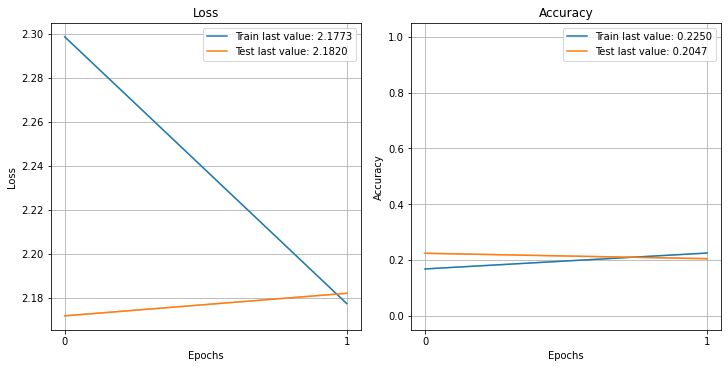

In [ ]:
import matplotlib.pyplot as plt
from plotly.offline import iplot
!pip install plot_keras_history
from plot_keras_history import plot_history
plot_history(mod_2)

In [ ]:

prediction = modelRNN.predict(X_val)

labels = ['bad_religion', 'bee_gees', 'beyonce', 'chris_brown', 'ella_fitzgerald', 'elton_john', 'elvis_costello', 'elvis_presley', 'glee', 'the_rolling_stones']
print(prediction)
pred_str = []
for i in range(700):
  pred_str.append(labels[np.argmax(prediction[i])])
(unique, counts) = np.unique(pred_str, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[0.00622783 0.0077385  0.51898175 ... 0.02311949 0.13300845 0.03021261]
 [0.05870477 0.13421158 0.04597966 ... 0.23990214 0.10399468 0.09348586]
 [0.05870477 0.13421163 0.04597966 ... 0.23990211 0.10399468 0.09348586]
 ...
 [0.05945627 0.13461444 0.0443826  ... 0.24640162 0.09759777 0.09739693]
 [0.05870477 0.13421158 0.04597966 ... 0.23990214 0.10399466 0.09348585]
 [0.05870477 0.13421161 0.04597966 ... 0.23990214 0.10399467 0.09348586]]
[['beyonce' '70']
 ['chris_brown' '15']
 ['elvis_presley' '615']]


In [ ]:

prediction = modelRNN.predict(X_train)

labels = ['bad_religion', 'bee_gees', 'beyonce', 'chris_brown', 'ella_fitzgerald', 'elton_john', 'elvis_costello', 'elvis_presley', 'glee', 'the_rolling_stones']
print(prediction)
pred_str = []
for i in range(2000):
  pred_str.append(labels[np.argmax(prediction[i])])
(unique, counts) = np.unique(pred_str, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[0.05870477 0.13421161 0.04597966 ... 0.23990214 0.10399468 0.09348586]
 [0.05870477 0.13421161 0.04597966 ... 0.23990214 0.10399468 0.09348586]
 [0.05870477 0.13421161 0.04597966 ... 0.23990214 0.10399468 0.09348586]
 ...
 [0.05870477 0.13421163 0.04597966 ... 0.23990214 0.10399466 0.09348585]
 [0.05870477 0.13421161 0.04597966 ... 0.23990211 0.10399466 0.09348587]
 [0.05870477 0.13421161 0.04597966 ... 0.23990214 0.10399468 0.09348586]]
[['beyonce' '196']
 ['chris_brown' '52']
 ['elvis_costello' '1']
 ['elvis_presley' '1751']]


In [ ]:
modelRNN.save('modelrnnTF.h5')

In [ ]:
reconstructed_model = keras.models.load_model("modelrnnTF.h5")

In [ ]:
prediction= reconstructed_model.predict(X_val)

In [ ]:
prediction.shape

(928, 10)

In [ ]:
prediction = modelRNN.predict(X_val)

labels = ['bad_religion', 'bee_gees', 'beyonce', 'chris_brown', 'ella_fitzgerald', 'elton_john', 'elvis_costello', 'elvis_presley', 'glee', 'the_rolling_stones']
print(prediction)
pred_str = []
for i in range(500):
  pred_str.append(labels[np.argmax(prediction[i])])


(unique, counts) = np.unique(pred_str, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[0.00243493 0.00232321 0.44465724 ... 0.00307112 0.04687304 0.00241296]
 [0.01705794 0.03410567 0.01084255 ... 0.51283646 0.03533327 0.05858924]
 [0.01705795 0.03410568 0.01084255 ... 0.51283634 0.03533327 0.05858924]
 ...
 [0.07499576 0.0910959  0.05163916 ... 0.27884927 0.07180508 0.11679089]
 [0.01705795 0.03410568 0.01084255 ... 0.51283634 0.03533328 0.05858924]
 [0.01705795 0.03410568 0.01084255 ... 0.51283634 0.03533329 0.05858924]]
[['beyonce' '31']
 ['chris_brown' '27']
 ['elvis_presley' '442']]


single layer lstm

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, LSTM
from keras.callbacks import EarlyStopping
vocab_size = 5000

model03 = Sequential()
model03.add(Embedding(input_dim=vocab_size,          # input_dim is the size of the vocabulary
                           output_dim=embedding_dim,      # output_dim is the size of the dense vector
                           input_length=400))          # input_length is the length of the sequence
model03.add(LSTM(embedding_dim))
model03.add(Dense(200, activation='relu'))
model03.add(Dropout(0.2))
model03.add(Dense(10, activation='softmax'))

model03.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 400, 200)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 200)               320800    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 1,363,010
Trainable params: 1,363,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model03.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"]
)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mod3=model03.fit(X_train,y_train, batch_size=64, epochs=10, validation_data=(X_val,y_val),callbacks=[es])

Epoch 1/10
131/131 [==============================] - 8s 49ms/step - loss: 2.2185 - acc: 0.2321 - val_loss: 2.0984 - val_acc: 0.2317
Epoch 2/10
131/131 [==============================] - 6s 45ms/step - loss: 2.1051 - acc: 0.2448 - val_loss: 2.0693 - val_acc: 0.2446
Epoch 3/10
131/131 [==============================] - 6s 45ms/step - loss: 2.0652 - acc: 0.2653 - val_loss: 2.0362 - val_acc: 0.2586
Epoch 4/10
131/131 [==============================] - 6s 46ms/step - loss: 1.9603 - acc: 0.2944 - val_loss: 2.1228 - val_acc: 0.2565
Epoch 00004: early stopping


In [ ]:
loss, accuracy = model03.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model03.evaluate(X_val, y_val, verbose=False)
print("validation Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.2814
validation Accuracy:  0.2565


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3006ce0910>,
       dtype=object))

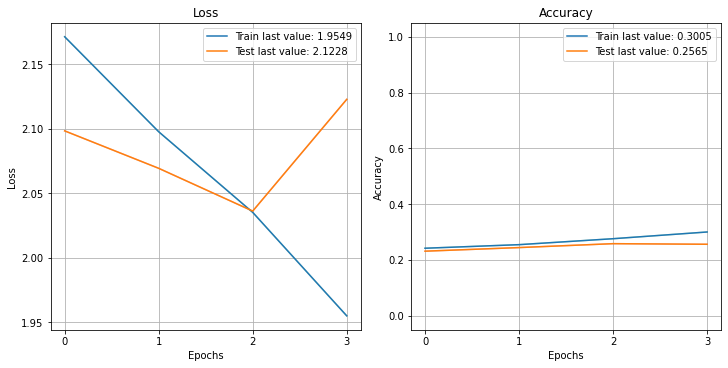

In [ ]:
import matplotlib.pyplot as plt
from plotly.offline import iplot
!pip install plot_keras_history
from plot_keras_history import plot_history
plot_history(mod3)

In [ ]:
model03.save('modeltfsL.h5')

In [26]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1IJwr8FTxZ2-47pcP239AtSIK88lmQKLX', dest_path='./model/lstmtf.h5')

ft_model = tf.keras.models.load_model('./model/lstmtf.h5')

ft_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 400, 200)          1000000   
_________________________________________________________________
lstm_8 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_10 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2010      
Total params: 1,363,010
Trainable params: 1,363,010
Non-trainable params: 0
_________________________________________________________________
